S5715407-Wang-Mengyun

# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [29]:
# Q1 (code)
#Install necessary libraries 
!pip install tomotopy
!pip install little_mallet_wrapper

In [30]:
# Import the needed libraries 
import tomotopy as tp
import little_mallet_wrapper
import pandas as pd

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [201]:
# Q2 (code)
# Load the 2 datasets 
trump_tweets = pd.read_csv('trump_tweets.csv') 
sanders_tweets = pd.read_csv('sanders_tweets.csv')

# Concatenate the datasets
combined_tweets = pd.concat([trump_tweets, sanders_tweets], ignore_index=True)
combined_tweets.head()

,Username,TweetId,Title,Content
0,@realDonaldTrump,822421390125043713,@realDonaldTrump_822421390125043713,It all begins today! I will see you at 11:00 ...
1,@realDonaldTrump,822501803615014918,@realDonaldTrump_822501803615014918,Today we are not merely transferring power fr...
2,@realDonaldTrump,822501939267141634,@realDonaldTrump_822501939267141634,"power from Washington, D.C. and giving it bac..."
3,@realDonaldTrump,822502135233384448,@realDonaldTrump_822502135233384448,What truly matters is not which party control...
4,@realDonaldTrump,822502270503972872,@realDonaldTrump_822502270503972872,"January 20th 2017, will be remembered as the ..."


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [277]:
# Define a function to transform tweets to lowercase, and remove stopwords, punctuation, numbers, URLS and user mentions
def clean_tweet(content):
    
    # Remove numbers, stopwords, punctuation, and convert text to lowercase 
    processed_text = little_mallet_wrapper.process_string(content, numbers='remove', lowercase=True, remove_stop_words = True, remove_punctuation= True)
    
    
    # Remove URLs and user mentions
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)

    return processed_text


# Create empty lists to store processed data
training_data = []
original_texts = []
titles = []

# Iterating over each row in 'combined_tweets' DataFrame to process tweet data individually.
for index, row in combined_tweets.iterrows():
    # Clean the tweet content
    cleaned_tweet = clean_tweet(row['Content'])

    # Add the processed text to the training data list
    training_data.append(cleaned_tweet)

    # Add the original tweet content to the original_texts list
    original_texts.append(row['Content'])

    # Create a tuple (Username, TweetId) to uniquely identify the tweet and add to titles list
    titles.append((row['Username'], row['TweetId']))

In [278]:
# Check the lists
len(training_data), len(original_texts), len(titles)

(30371, 30371, 30371)

In [279]:
# Check the training data
training_data[0]

'begins today see swearing movement continues work begins'

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [204]:
# Q4 (code)

# Create a function to train the model with 10 iterations
def train_lda_model(training_data, num_topics, iterations=10):
    
    # Create an instance of the LDA model
    model = tp.LDAModel(k=num_topics)
    
    # Add data to the model
    for doc in training_data:
        model.add_doc(doc.strip().split())

    # Train the model
    for i in range(0, 100, 10):
        model.train(iterations)
        
        # Print log-likelihood every 10 iterations
        print('Iteration: {}\tLog-likelihood: {}'.format(i, model.ll_per_word))
    
    # Return the trained model
    return model

# Train the LDA model with 15 topics, and iterate 10 times
train_lda_model_15 = train_lda_model(training_data, 15, iterations=10)

Iteration: 0	Log-likelihood: -9.71075964158593
Iteration: 10	Log-likelihood: -9.320406589033166
Iteration: 20	Log-likelihood: -9.137116160759188
Iteration: 30	Log-likelihood: -9.037478688007319
Iteration: 40	Log-likelihood: -8.964206719324947
Iteration: 50	Log-likelihood: -8.913831961503657
Iteration: 60	Log-likelihood: -8.878304625000618
Iteration: 70	Log-likelihood: -8.852345534512132
Iteration: 80	Log-likelihood: -8.83636577677899
Iteration: 90	Log-likelihood: -8.821705540930024


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [205]:
# Q5a (code)

# Create an empty list to store the full string of topic words.
topics = []

# Create an empty list to store topic words as individual elements.
topic_individual_words = []

# Iterate through a range of numbers, which correspond to topic IDs from 0 to 14 (15 topics in total).
for topic_number in range(0, 15): 
    
    # Generate a string of the top 10 words for the current topic, joined by spaces.
    # This is done by retrieving topic words and their probabilities from the model
    # and only using the words for the string.
    topic_words = ' '.join(word for word, prob in train_lda_model_15.get_topic_words(topic_id=topic_number, top_n=10))
    
    # Add the generated string of topic words to the 'topics' list.
    topics.append(topic_words)
    
    # Split the string of topic words into individual words and add to the 'topic_individual_words' list.
    topic_individual_words.append(topic_words.split())
    
    # Print the topic number and its words in a formatted manner.
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

✨Topic 0✨

trump president economy jobs history ever years great best since

✨Topic 1✨

news fake media people even would never like bad many

✨Topic 2✨

health care people workers million americans must right need make

✨Topic 3✨

president whitehouse great today thank live trump honor join conference

✨Topic 4✨

law police thank enforcement twitter god cities federal order city

✨Topic 5✨

united states china trade great deal many president world good

✨Topic 6✨

great thank america climate change energy maga tonight see fossil

✨Topic 7✨

president democrats impeachment trump biden house schiff joe pelosi nothing

✨Topic 8✨

tax border wall security want trump billion dollars cut money

✨Topic 9✨

coronavirus covid new help puerto federal people hurricane rico state

✨Topic 10✨

must people trump congress senate war end american republicans bill

✨Topic 11✨

american country people america women must stand nation today every

✨Topic 12✨

election court vote republican win great new 

**Q5b (words)**

**Describe what each topic is about. What ideas, values, or situations do these keywords refer to?**

Topic 0 - Politics and Governance: Refers to President Trump's economic policies, employment, and perhaps boasts of historical achievements or declarations of being the best in years.

Topic 1 - Media and Public Perception: Discusses the concept of 'fake news,' media criticism, and public skepticism.

Topic 2 - Healthcare: Evokes issues related to health care, workers, and the American populace, perhaps emphasizing needs and rights.

Topic 3 - Presidential Activities: Likely about events at the White House, possibly involving President Trump, including thanks, live events, and press conferences.

Topic 4 - Law Enforcement and Social Order: Engages with law enforcement appreciation, legal order and possibly discussing federal roles in cities.

Topic 5 - International Relations and Trade: Centers on the United States' relations with China, trade deals, and international standing.

Topic 6 - Environment and Politics: Deals with climate change and energy policies, with a nod to political support (e.g., "MAGA").

Topic 7 - Political Conflict: Reflects the political controversy involving Democrats, impeachment proceedings, and key figures related to President Trump.

Topic 8 - National Security and Immigration: Focuses on tax, border security, possibly discussions around the border wall and fiscal policies.

Topic 9 - Public Health Emergency: Pertains to the coronavirus (COVID-19) pandemic and federal response, with specific mention of Puerto Rico, possibly reflecting hurricane recovery efforts as well.

Topic 10 - Legislative Affairs: Concerns national governance, Congressional actions, war, and legislation, indicating a focus on American political processes.

Topic 11 - National Identity and Values: Reflects patriotic sentiments, national unity, and the role of women, highlighting American identity and societal values.

Topic 12 - Electoral Processes: About election dynamics, the courts, voting, and perhaps the Republican Party.

Topic 13 - Investigations and Controversies: Relates to federal investigations, Russia, and other high-profile political controversies and figures from recent years.

Topic 14 - Endorsements and Constitutional Values: Talks about political endorsements, voting, military support, state governance, and possibly references to constitutional amendments.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [38]:
# There are different metrics for coherence, we choose `c_v`

#coh = tp.coherence.Coherence(model, coherence='c_v')
#average_coherence = coh.get_score()
#coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

#print('==== Coherence : {} ===='.format('c_v'))
#print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
#print()

In [207]:
# define a fuction to calculate the coherence score according to different 'num_topics'
def train_lda_and_compute_coherence(training_data, num_topics, iterations=10):
    
    # Create an instance of the LDA model
    model = tp.LDAModel(k=num_topics)
    
    # Add documents to the model
    for doc in training_data:
        model.add_doc(doc.strip().split())
    
    # Iterate and train the model
    for i in range(0, 100, 10):
        model.train(iterations)
        
    # Calculate coherence score
    coherence_model = tp.coherence.Coherence(model, coherence='c_v')
    average_coherence = coherence_model.get_score()
    topic_coherence_scores = [coherence_model.get_score(topic_id=k) for k in range(num_topics)]
    
    print(
    f'When the number of topics is {num_topics}: \n\n'
    f'The average coherence is {average_coherence} \n\n'
    f'The topic coherence scores are {topic_coherence_scores}.')

In [225]:
# Use the function to calculate
num_topics = 15
num_topics_15_coherence = train_lda_and_compute_coherence(training_data, num_topics, iterations=10)

When the number of topics is 15: 

The average coherence is 0.5830942693104346 

The topic coherence scores are [0.5494101345539093, 0.5859812557697296, 0.5874847203493119, 0.4773212820291519, 0.7199403882026673, 0.5515062507241965, 0.5464844107627869, 0.480795119702816, 0.6363970816135407, 0.6660387337207794, 0.572006507217884, 0.7495893210172653, 0.5068699672818184, 0.6820072889328003, 0.43458157777786255].


In [226]:
# Use the function to calculate
num_topics = 20
num_topics_20_coherence = train_lda_and_compute_coherence(training_data, num_topics, iterations=10) 

When the number of topics is 20: 

The average coherence is 0.5835867535881698 

The topic coherence scores are [0.5488627284765244, 0.6632737249135972, 0.5082253575325012, 0.5530355229973793, 0.5909096449613571, 0.5943082869052887, 0.5334749788045883, 0.6876468673348427, 0.5311198368668556, 0.6616744577884675, 0.7648193925619126, 0.4874886482954025, 0.7207827597856522, 0.5826073985546827, 0.5252849876880645, 0.4925104945898056, 0.5284288823604584, 0.5707807071506977, 0.5831924706697464, 0.5433079235255718].


In [227]:
# Use the function to calculate
num_topics = 25
num_topics_25_coherence = train_lda_and_compute_coherence(training_data, num_topics, iterations=10) 

When the number of topics is 25: 

The average coherence is 0.5975427757799625 

The topic coherence scores are [0.5097879767417908, 0.7626674681901932, 0.5562630623579026, 0.6192345052957535, 0.5868345394730567, 0.5718150675296784, 0.5744784832000732, 0.5672318190336227, 0.6375417739152909, 0.5285975769162178, 0.5721033036708831, 0.6768889278173447, 0.7477010428905487, 0.6340551346540451, 0.5740858227014541, 0.4985228508710861, 0.7108630537986755, 0.5644086718559265, 0.5274486660957336, 0.5783175799995661, 0.536702536419034, 0.5406751945614815, 0.6568373933434486, 0.6409624949097633, 0.5645444482564926].


In [228]:
# Use the function to calculate
num_topics = 30
num_topics_30_coherence = train_lda_and_compute_coherence(training_data, num_topics, iterations=10)

When the number of topics is 30: 

The average coherence is 0.6167498196288944 

The topic coherence scores are [0.5980645582079888, 0.6464481547474861, 0.6332089632749558, 0.6886014670133591, 0.46870830953121184, 0.6470170497894288, 0.7953882902860642, 0.6543992012739182, 0.5331811040639878, 0.6074497923254967, 0.5157551735639572, 0.5966994822025299, 0.5850914806127548, 0.5304586693644524, 0.5947470873594284, 0.4847089767456055, 0.7302913844585419, 0.6940451890230179, 0.6522703763097525, 0.5449322834610939, 0.6402886718511581, 0.6877205193042755, 0.6776570677757263, 0.7370419919490814, 0.5171715140342712, 0.5781230300664901, 0.5901106655597687, 0.7350592762231827, 0.6305698752403259, 0.5072849832475186].


In [229]:
# Use the function to calculate
num_topics = 35
num_topics_35_coherence = train_lda_and_compute_coherence(training_data, num_topics, iterations=10)

When the number of topics is 35: 

The average coherence is 0.6138036818057298 

The topic coherence scores are [0.5987375974655151, 0.6707818388938904, 0.41924925446510314, 0.597931632399559, 0.5928328454494476, 0.5208547353744507, 0.5544359594583511, 0.7330370336771012, 0.513319306075573, 0.5163790658116341, 0.7335008144378662, 0.5145569711923599, 0.6818532049655914, 0.6314436703920364, 0.5768961519002914, 0.5925900250673294, 0.5097901940345764, 0.6243624746799469, 0.553762038052082, 0.670854127407074, 0.5499124228954315, 0.5788947209715843, 0.6970502346754074, 0.668200671672821, 0.6877768438309431, 0.6684460759162902, 0.6637332677841187, 0.6735858872532845, 0.6129730999469757, 0.6329491168260575, 0.5799801543354988, 0.7635147213935852, 0.808272635936737, 0.527925829589367, 0.5627442389726639].


#### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained


#### Initial Training with 15 Topics
- **Average Coherence:** 0.5831
- This initial setup resulted in moderate average coherence with the highest individual topic coherence of 0.7496 (topic 11) and the lowest at 0.4346 (topic 14).

#### Changes in Number of Topics and Resulting Coherence Scores:

1. **20 Topics:**
   - **Average Coherence:** 0.5836 (slight increase from 15 topics)
   - The highest individual topic coherence increased to 0.7648 (topic 10), indicating better interpretability for that specific topic. The range of coherence also widened slightly, with the lowest score being 0.4925 (topic 15).

2. **25 Topics:**
   - **Average Coherence:** 0.5975 (increase from 20 topics)
   - The model presents improvement in general topic interpretability with the highest coherence reaching 0.7627 (topic 1). However, the lowest coherence score dropped to 0.4121 (topic 21), suggesting some topics are becoming less coherent, possibly due to the model being overextended.

3. **30 Topics:**
   - **Average Coherence:** 0.6167 (further increase from 25 topics)
   - This model provides the best average coherence yet, indicating improved overall topic quality. The peak coherence is quite high at 0.7954 (topic 6), suggesting a very interpretable topic. However, the presence of a relatively low score at 0.4687 (topic 4) indicates some topics are less interpretable.

4. **35 Topics:**
   - **Average Coherence:** 0.6138 (slight decrease from 30 topics)
   - Despite the slight drop in average coherence, the highest coherence score reaches 0.8083 (topic 32), suggesting one or more highly interpretable topics, possibly the best single topic result across all models. However, the spread remains wide, with a low of 0.4192 (topic 2).

#### Insights:
- Adding more topics seems to have driven a selective increase in the interpretability of some topics, which is demonstrated by the highest coherence scores in the 25, 30, and 35 topics settings.
- The highest average coherence score is found with 30 topics, suggesting that this might be the most balanced choice in topic granularity and interpretability for this dataset.
- Excessive granularity (35 topics) has led to a mix of high and low extremes, indicating potential overfitting where some topics may not be meaningfully distinct from others.

This analysis would recommend considering the model with 30 topics for the best balance of coherence on average, coupled with the evidence of some highly coherent individual topics. However, it is essential to consider the lowest coherence scores, as they may indicate topics that are not well captured by the model and could signify a need for additional data cleaning, reevaluation of topic number, or further iterations of modeling.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

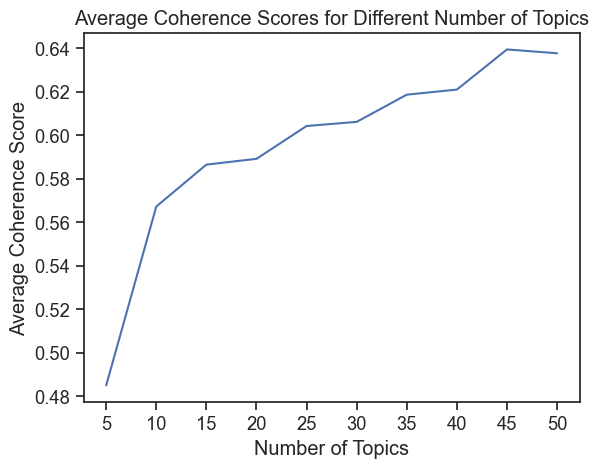

In [232]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
import matplotlib.pyplot as plt


# Function to gain average coherence of models with different numbers of topics 
def train_lda_and_coherence_for_plot(training_data, num_topics, iterations=10):
    # Create an instance of the LDA model
    model = tp.LDAModel(k=num_topics)
    
    # Add documents to the model
    for doc in training_data:
        model.add_doc(doc.strip().split())  # Strip whitespace and split the document into tokens
    
    # Train the model
    for i in range(iterations):
        model.train()
        
    # Calculate coherence score
    coherence = tp.coherence.Coherence(model, coherence='c_v')  # Compute coherence score using c_v coherence
    average_coherence = coherence.get_score()  # Get the average coherence score
    
    return average_coherence


# Function to plot average coherence scores
def plot_coherence_scores(training_data, topic_range):
    scores = [] # Create an empty list to put the average coherence scores
    
    # Train LDA models for different numbers of topics and calculate coherence scores
    for num_topics in topic_range:
        score = train_lda_and_coherence_for_plot(training_data, num_topics)  # Get coherence score for each number of topics
        scores.append(score)  # Append the score to the list of scores
    
    # Plot the scores 
    plt.plot(topic_range, scores)  # Plot coherence scores against number of topics
    plt.title('Average Coherence Scores for Different Number of Topics')  # Set the title of the plot
    plt.xlabel('Number of Topics')  # Set the label for x-axis
    plt.ylabel('Average Coherence Score')  # Set the label for y-axis
    plt.xticks(topic_range)  # Set x-axis ticks to be the range of topics
    plt.show()  # Display the plot

# Taking the range from 5 to 55 (not included) as an example, with increments of 5   

topic_range = range(5, 55, 5) 
plot_coherence_scores(training_data, topic_range)

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [233]:
# Calculate the topic distributions for all documents in the LDA model
topic_distributions = [list(doc.get_topic_dist()) for doc in train_lda_model_15.docs]

In [238]:
from IPython.display import Markdown, display
import re

# Define a function to display a string in Markdown format
def make_md(string):
    display(Markdown(str(string)))

# Define a function to display the top documents associated with a specific topic, along with their topic probabilities.
# It takes the following parameters:
# - docs: List of documents
# - topic_distributions: List of topic distributions for each document
# - topic_index: Index of the topic for which the top documents are retrieved
# - n: Number of top documents to display (default is 5)    
def get_top_docs(docs, topic_distributions, topic_index, n=5):
    
    # Sort the documents based on the probability of the specified topic
    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    # Get the words associated with the specified topic
    topic_words = topics[topic_index]

    # Display the topic title along with its associated words
    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")

    # Iterate over the sorted documents to display the top n documents
    for probability, doc in sorted_data[:n]:
        
        # Make topic words bolded in the document
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        # Display the topic probability and the document
        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [249]:
# Display 5 documents for topic 0 (Might be Trump)
get_top_docs(original_texts, topic_distributions, topic_index=0, n=5)

### ✨Topic 0✨

trump president economy jobs history ever years great best since



✨  
**Topic Probability**: 0.9410312175750732  
**Document**:  RT @Surgeon_General: Enjoyed talking with @SenThomTillis about the intersection of health and national security, as well as how community health ➡️ economic prosperity. #OpportunityNow https://t.co/kgVqGbFqtl



✨  
**Topic Probability**: 0.9366363883018494  
**Document**:  RT @IngrahamAngle: Republicans in the Congress should be asked:  why have you allowed the State Department to become an arm of the Democratic Party?  And what are you going to do about it? https://t.co/mPoy2ebfwU



✨  
**Topic Probability**: 0.9255372285842896  
**Document**:  Ratings are way down, lost all credibility. Beautiful to watch! https://t.co/wO9npDQ2Ys



✨  
**Topic Probability**: 0.9183895587921143  
**Document**:  RT @NHC_Atlantic: Here are the 5 AM Monday, September 2 Key Messages for Hurricane #Dorian. Life-threatening storm surge and hurricane-force winds are expected along portions of the Florida east coast through mid-week. Visit https://t.co/tW4KeFW0gB for more info. https://t.co/Ft5D7w6hB8



✨  
**Topic Probability**: 0.9142751693725586  
**Document**:  RT @TeamTrump: President @realDonaldTrump is pro-safety, pro-police and anti-crime! https://t.co/ojrT2Jxfda



In [250]:
# Display 5 documents for topic 3 (Might be Trump) 
get_top_docs(original_texts, topic_distributions, topic_index=3, n=5)

### ✨Topic 3✨

president whitehouse great today thank live trump honor join conference



✨  
**Topic Probability**: 0.9076013565063477  
**Document**:  Had a long and very good conversation with President Putin of Russia. As I have always said, long before the Witch Hunt started, getting along with Russia, China, and everyone is a good thing, not a bad thing....



✨  
**Topic Probability**: 0.9024207592010498  
**Document**:  Today, @FLOTUS Melania and I were honored to welcome Prime Minister @TurnbullMalcolm and Mrs. Turnbull of Australia to the @WhiteHouse!  🇺🇸🇦🇺Press Conference: https://t.co/rKokJGRsgu https://t.co/PkJUw8x9jb



✨  
**Topic Probability**: 0.9024207592010498  
**Document**:  It is my **great** **honor** to welcome Prime Minister @GiuseppeConteIT of Italy to the @WhiteHouse! Join us at 2:00pmE for our joint press **conference**: https://t.co/XAchZ3zUSe https://t.co/5t4QVsKKqH



✨  
**Topic Probability**: 0.8966246247291565  
**Document**:  There is a rise in Coronavirus cases because our testing is so massive and so good, far bigger and better than any other country. This is **great** news, but even better news is that death, and the death rate, is DOWN. Also, younger people, who get better much easier and faster!



✨  
**Topic Probability**: 0.8900965452194214  
**Document**:  Join me LIVE from the Rose Garden at 1:30pmE with Prime Minister Alexis Tsipras of Greece. ➡️https://t.co/Bn1vM6fYW9 https://t.co/dZB4mDBKpi



In [251]:
# Display 5 documents for topic 2 (Might be Sanders) 
get_top_docs(original_texts, topic_distributions, topic_index=2, n=5)

### ✨Topic 2✨

health care people workers million americans must right need make



✨  
**Topic Probability**: 0.9408664107322693  
**Document**: While we have more **people** in jail than any country, we are beginning to **make** progress on criminal justice reform. There is still a long way to go in creating a justice system that works for all, but we should celebrate the steps we are taking. https://t.co/O9y32EdvWk



✨  
**Topic Probability**: 0.9408664107322693  
**Document**: 7) Harold Pollack at the University of Chicago said: "Over the long run, the Sanders **people** are very correct that you could implement a system like this that would be more disciplined, more economical and more fair than the current U.S. **health** system." https://t.co/VJukz9EmUp



✨  
**Topic Probability**: 0.9387419819831848  
**Document**: Trump and his allies are stoking anti-Chinese bigotry in response to the coronavirus pandemic.

We cannot tolerate this kind of racism—especially at this moment.

This crisis requires our political leadership to unite our country, not divide us up. https://t.co/rgpx1epVLf



✨  
**Topic Probability**: 0.9364593029022217  
**Document**: I stand with St. Paul teachers striking for good pay, benefits, and more resources for students.

Our teachers should be the best-paid in the industrialized world, not among the worst-paid.

We **must** change our national priorities and invest in education. https://t.co/weL30k58Z2



✨  
**Topic Probability**: 0.9339998364448547  
**Document**: Under our profit-driven system, the wealthy can buy vaccines. The poor or working class may get sick or even die.

Protecting the **health** of the American **people** means taking **care** of everyone—including our most vulnerable.

We **need** Medicare for All.



### Q7b (words)
Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

### Q7b (words)

**Topic 0 - Politics and Governance:** 
The topic and the associated documents seem to align closely with President Trump's rhetoric. Phrases like "economic prosperity," "pro-safety, pro-police and anti-crime," and the focus on national security suggest a stronger association with Trump's known policy positions and his administration's initiatives.

**Topic 3 - Presidential Activities:**
The documents under this topic, especially the references to the White House and mentions of “honor” and “great,” are indicative of President Trump's tenure and activities. The press conference mentions and live events mirror the public engagement style of Trump during his presidency.

**Topic 2 - Healthcare:**
The strong focus on healthcare reform, the need for Medicare for All, and criticism of the profit-driven system are hallmark issues associated with Bernie Sanders. The documents reflect Sanders’ advocacy for a more equitable health system and his support for the working class, which are central to his political message.

The topics are more representative of one of the two politicians' views due to their consistency with the public policies they have advocated for and the language that each politician frequently uses. Trump’s tweets often celebrate his administration's actions and reinforce his perspectives on governance, law and order, and national success. Conversely, Sanders' tweets emphasize structural reforms, social justice, and healthcare, which are key components of his political platform.

The distinctiveness of these topics for each politician is also likely influenced by the unique set of issues they prioritize, which resonates through their use of social media and public engagement. This creates a clear divide in the content of their messages, allowing for topics to be clearly attributed to one or the other.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [252]:
# 'Random' module is imported to use the sampling capability
from random import sample
 
# 'Sample' function randomly picks 100 unique elements from 'title' list to create 'target_labels'
target_labels = sample(titles,100) 

# Check the samples
len(target_labels)

100

In [255]:
# Importing necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual appearance of the seaborn plots
sns.set(style='ticks', font_scale=1.2)

# Define a function to plot a heatmap representing the distribution of topics across various categories
def plot_categories_by_topics_heatmap(labels, 
                                      topic_distributions, 
                                      topic_keys, 
                                      output_path=None, 
                                      target_labels=None, 
                                      color_map=sns.cm.rocket_r, 
                                      dim=None):

    # Create an empty list that will hold the data for plotting
    dicts_to_plot = []
    
    # Loop through each label and its corresponding topic distribution
    for _label, _distribution in zip(labels, topic_distributions):
        
        # Check if a target label list is provided and if the current label is in it;
        # if no target list, proceed with every label
        if not target_labels or _label in target_labels:
            
            # Iterate through each topic's probability in the distribution
            for _topic_index, _probability in enumerate(_distribution):
                
                # Append a dictionary with the probability, category (label), and topic information to the list
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Convert the list of dictionaries to a pandas DataFrame for plotting
    df_to_plot = pd.DataFrame(dicts_to_plot)
    
    # Create a pivot table structured appropriately for seaborn's heatmap function
    df_wide = df_to_plot.pivot_table(index='Category', columns='Topic', values='Probability')
    
    # Normalize the columns of the dataframe (z-score normalization)
    df_norm_col = (df_wide - df_wide.mean()) / df_wide.std()

    # If specific dimensions are provided for the plot, set up the figure with the given size
    if dim:
        plt.figure(figsize=dim)

    # Create the heatmap using the normalized dataframe and a specified color map
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    
    # Position the x-axis labels on top of the heatmap
    ax.xaxis.tick_top()
    
    # Set the position of the x-axis labels to the top
    ax.xaxis.set_label_position('top')
    
    # Rotate the x-axis labels slightly for better legibility
    plt.xticks(rotation=30, ha='left')
    
    # Use tight_layout to ensure the elements of the plot are neatly displayed without overlap
    plt.tight_layout()
    
    # Render the plot
    plt.show()

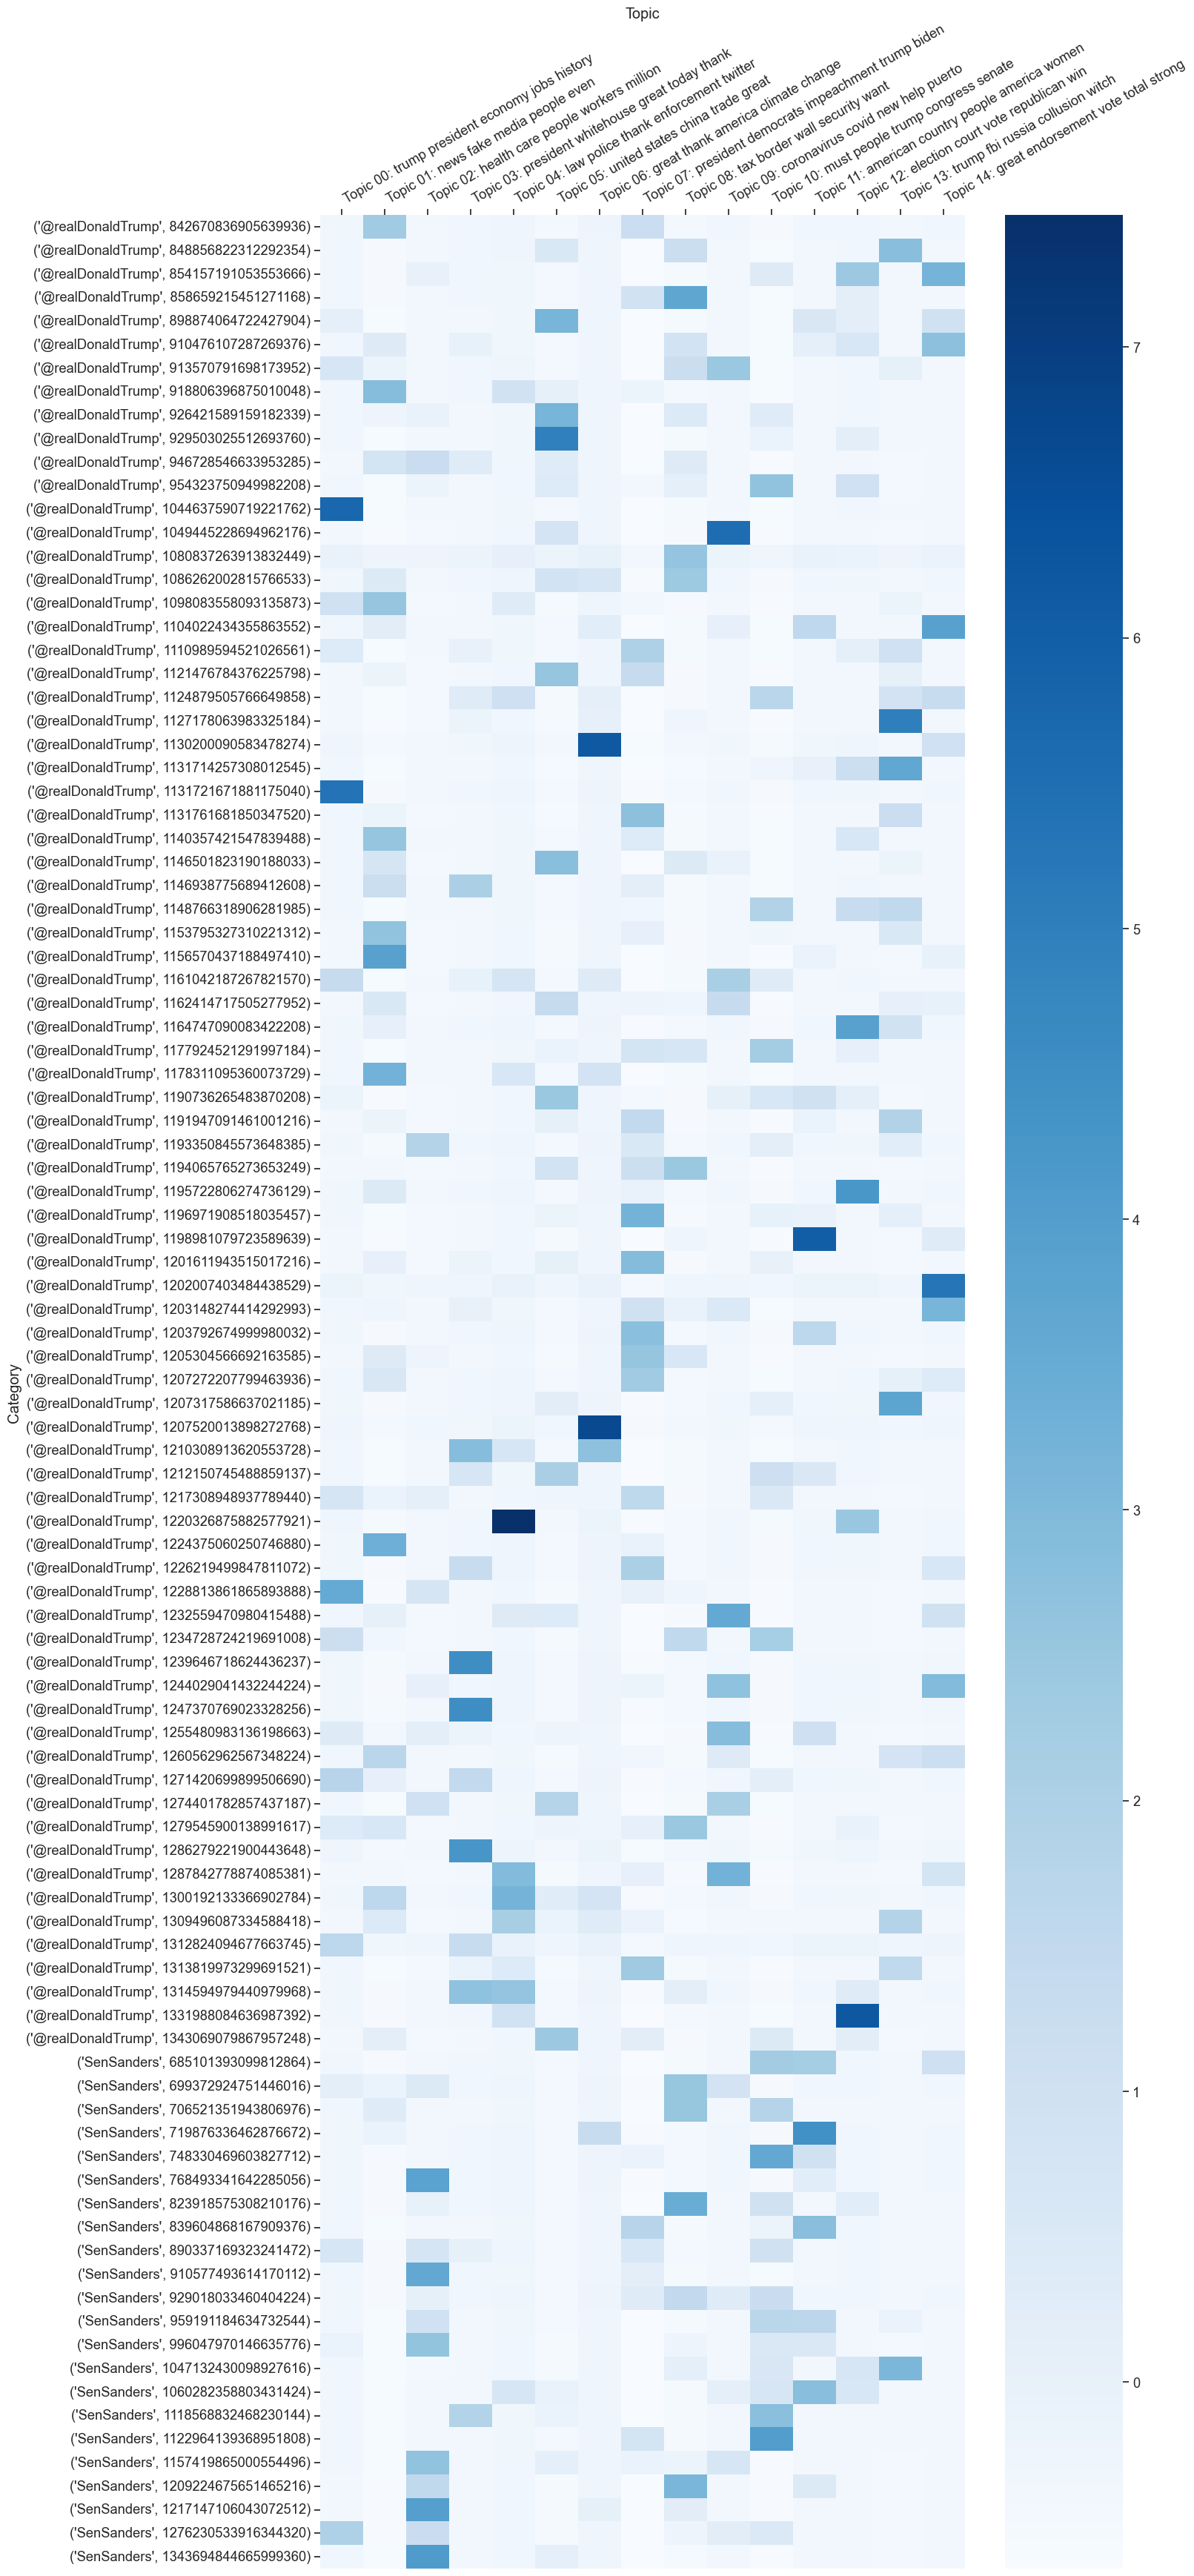

In [256]:
# Put parameters and plot
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(16,35))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

### Q9 (words)
1. For Sanders, topics with a deeper color representation on the heatmap, such as Topic 02 ("health care people workers million americans must right need make"), Topic 10 ("must people trump congress senate war end american republicans bill"), and Topic 11 ("american country people america women must stand nation today every"), suggest a greater emphasis on healthcare, legislative action, and perhaps topics related to societal structure and rights. This could be indicative of Sanders' known advocacy for healthcare reform and workers’ rights. Such topics carry significant weight in his political communication.

2. Conversely, for Trump, the topics that are more prominently colored are Topic 01 ("news fake media people even would never like bad many") and Topic 05 ("united states china trade great deal many president world good"). The emphasis on these topics aligns with Trump's public discourse on the media, which he often lambastes as “fake news,” and his focus on international trade deals, particularly with China. The lighter color representation of Topic 02, Topic 10, and Topic 11 within Trump’s segment highlights a lower emphasis on healthcare, congressional activities, and societal issues in his communications.

In summary, the heatmap suggests distinctive patterns where each politician has topics that they are more likely to discuss. Sanders' communications are more saturated with topics on healthcare and social issues, while Trump’s discussions are centered around media representation and international trade. These findings correlate with their known political positions and the agendas they prioritize in their public statements.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [271]:
# X2 (code)

# Create a list containing items related to Trump and Sanders
trump_list = [item for item in titles if item[0] == '@realDonaldTrump'] # Extract items related to Trump
sanders_list = [item for item in titles if item[0] == 'SenSanders'] # Extract items related to Sanders

# Randomly select 50 Trump-related and 50 Sanders-related items
random_trump = sample(trump_list, 50) # Randomly select 50 items from the Trump list
random_sanders = sample(sanders_list, 50) # Randomly select 50 items from the Sanders list

# Combine the two lists together
combined_sample = random_trump + random_sanders

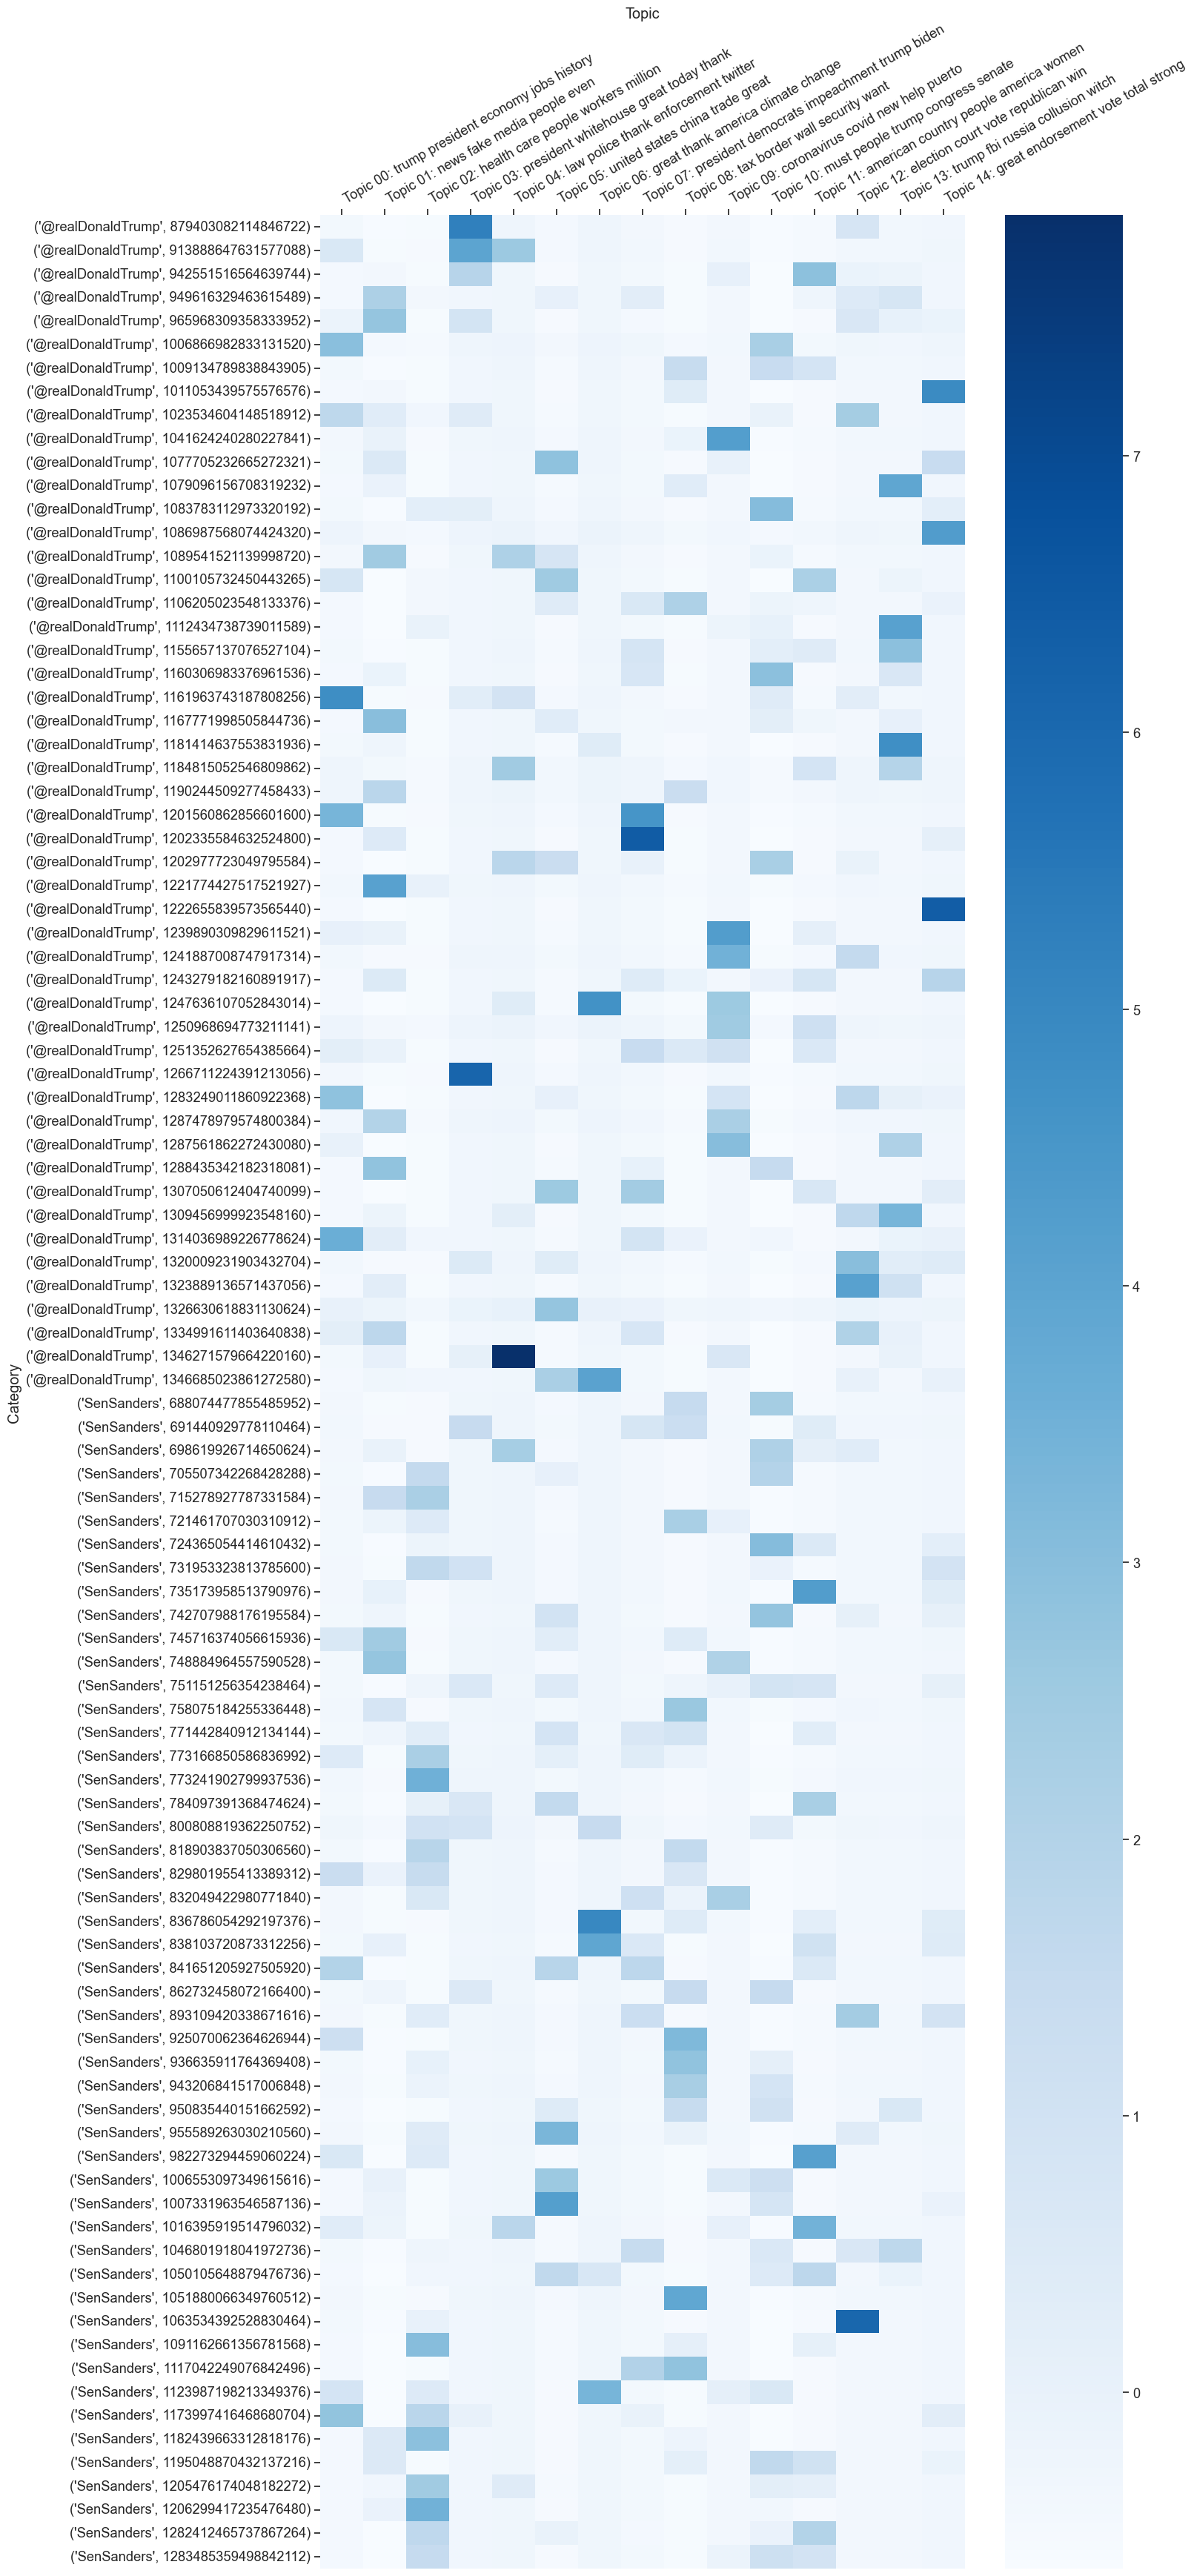

In [269]:
# Use the plotting function above and put the parameters
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=combined_sample,
                                  color_map = 'Blues',
                                 dim=(16,35))

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [272]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)

# Create an empty list to store topic modeling results
topic_results = []

# Loop through each title and corresponding topic distribution
for title, topic_distribution in zip(titles, topic_distributions):
    
    # Append a dictionary with the title and its topic distribution to the list
    topic_results.append({'document': title, 'topic_distribution': topic_distribution})

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(topic_results)

# Construct column names by enumerating over each topic and the first four words associated with that topic
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]

# Convert the topic distributions into a DataFrame and assign it as new columns in our main DataFrame
df[column_names] = pd.DataFrame(df['topic_distribution'].tolist(), index=df.index)

# Drop the 'topic_distribution' column as it is now redundant
df = df.drop('topic_distribution', axis='columns')

# Sort the DataFrame based on the values of the column associated with the first topic
# in descending order 
# display the top 6 rows.
df.sort_values(by='Topic 0 trump president economy jobs', ascending=False)[:6]

,document,Topic 0 trump president economy jobs,Topic 1 news fake media people,Topic 2 health care people workers,Topic 3 president whitehouse great today,Topic 4 law police thank enforcement,Topic 5 united states china trade,Topic 6 great thank america climate,Topic 7 president democrats impeachment trump,Topic 8 tax border wall security,Topic 9 coronavirus covid new help,Topic 10 must people trump congress,Topic 11 american country people america,Topic 12 election court vote republican,Topic 13 trump fbi russia collusion,Topic 14 great endorsement vote total
14272,"(@realDonaldTrump, 1226523864592736256)",0.941031,0.007781,0.004520,0.003298,0.002471,0.005064,0.003018,0.004399,0.005482,0.002724,0.005274,0.004646,0.003969,0.003559,0.002765
11341,"(@realDonaldTrump, 1186097821579124736)",0.936636,0.008361,0.004856,0.003544,0.002655,0.005441,0.003243,0.004726,0.005891,0.002927,0.005667,0.004993,0.004265,0.003825,0.002971
9634,"(@realDonaldTrump, 1163810691599470592)",0.925537,0.009825,0.005707,0.004164,0.003120,0.006394,0.003811,0.005554,0.006923,0.003440,0.006659,0.005867,0.005012,0.004495,0.003491
9985,"(@realDonaldTrump, 1168486977764757504)",0.918390,0.010768,0.006255,0.004564,0.003419,0.007008,0.004177,0.006087,0.007587,0.003770,0.007299,0.006430,0.005493,0.004926,0.003826
18436,"(@realDonaldTrump, 1282889354684358657)",0.914275,0.011311,0.006570,0.004794,0.003592,0.007361,0.004388,0.006394,0.007970,0.003960,0.007667,0.006754,0.005770,0.005174,0.004019
14561,"(@realDonaldTrump, 1230884976977043456)",0.909724,0.011912,0.006919,0.005049,0.003782,0.007752,0.004621,0.006734,0.008393,0.004170,0.008074,0.007113,0.006076,0.005449,0.004232


In [273]:
# Save the dataframe as csv format
df.to_csv('Topic-Distributions.csv', encoding='utf-8', index=False)